In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [15]:
# IMPORT: Tableau Superstore dataset

df = pd.read_csv("../data/superstore.csv")

In [16]:
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [17]:
# CHANGE: to non-numeric types

# Type Change: 2 columns -> str
df['Customer ID'] = df['Customer ID'].astype("string")
df['Product ID'] = df['Product ID'].astype("string")

# Type Change: 5 columns -> category 
df['Ship Mode'] = df['Ship Mode'].astype("category")
df['Segment'] = df['Segment'].astype("category")
df['Region'] = df['Region'].astype("category")
df['Category'] = df['Category'].astype("category")
df['Sub-Category'] = df['Sub-Category'].astype("category")

# Type Change: 2 columns -> datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [18]:
df['Order Date'].values

array(['2016-11-08T00:00:00.000000000', '2016-11-08T00:00:00.000000000',
       '2016-06-12T00:00:00.000000000', ...,
       '2017-02-26T00:00:00.000000000', '2017-02-26T00:00:00.000000000',
       '2017-05-04T00:00:00.000000000'], dtype='datetime64[ns]')

In [19]:
df['Order Date'].values.astype(int)

array([1478563200000000000, 1478563200000000000, 1465689600000000000, ...,
       1488067200000000000, 1488067200000000000, 1493856000000000000])

In [20]:
# CHANGE: datetime to int

df['Order Date'] = df['Order Date'].values.astype(int) / 10**14
df['Ship Date'] = df['Ship Date'].values.astype(int) / 10**14

In [21]:
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,14785.632,14788.224,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,14785.632,14788.224,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,14656.896,14660.352,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,14445.216,14451.264,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,14445.216,14451.264,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,13902.624,13904.352,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,CA-2017-121258,14880.672,14884.992,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,CA-2017-121258,14880.672,14884.992,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,CA-2017-121258,14880.672,14884.992,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [22]:
# ASSIGN: ids to string id columns

id_columns = [
    "Customer ID",
    "Product ID",
]
for i in id_columns:
    df[i+'_id'] = df.groupby(i).ngroup()

In [23]:
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Customer ID_id,Product ID_id
0,CA-2016-152156,14785.632,14788.224,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,143,12
1,CA-2016-152156,14785.632,14788.224,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,143,55
2,CA-2016-138688,14656.896,14660.352,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,237,946
3,US-2015-108966,14445.216,14451.264,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,705,319
4,US-2015-108966,14445.216,14451.264,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,705,1316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,13902.624,13904.352,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,...,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,737,200
9990,CA-2017-121258,14880.672,14884.992,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,190,164
9991,CA-2017-121258,14880.672,14884.992,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,190,1816
9992,CA-2017-121258,14880.672,14884.992,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,190,1247


In [24]:
# DROP: 10 Columns

# id: "Customer ID", "Product ID"
# no value: "Row ID", "Order ID", "Country"
# redundancy: "Customer Name", "Product Name", "City", "State", "Postal Code"

noval_columns = [
#    "Row ID", 
   "Order ID", "Country"
]
redundant_columns = [
    "Customer Name", "Product Name", 
    "City", "State", "Postal Code"
]
dropping_columns = id_columns + noval_columns + redundant_columns

df_f = df.drop(columns=dropping_columns)

In [25]:
# PROFILE: exploratory analysis

# import ydata_profiling as yp

# report_super_f = df_f.profile_report()
# report_super_f.to_file(output_file="0409_super_f_report.html")

In [26]:
# ENCODE: 5 categories' datatype

category_columns = [
    "Ship Mode", #4
    "Segment", #3
    "Region", #4
    "Category", #3
    "Sub-Category" #17
]

for i in category_columns:
    ohe = OneHotEncoder()
    ohe_df = pd.DataFrame(
        ohe.fit_transform(df_f[[i]]).toarray())
    # add suffix to column names in ohe_df
    ohe_df.columns = ohe_df.columns.astype(str)
    ohe_df = ohe_df.add_suffix(i)
    df_f = df_f.join(ohe_df)

In [27]:
# DROP & NORMALIZE

scaler = StandardScaler()
scaled_df_f = scaler.fit_transform(
    df_f.drop(category_columns, axis=1))

In [28]:
len(scaled_df_f[0])

39

# Testing For Methods ->>>>>

Explained Variance: [8.28750454e-02 7.53955846e-02 5.20652067e-02 4.58641640e-02
 4.45834792e-02 4.31725147e-02 4.24973003e-02 3.66225412e-02
 3.44063003e-02 3.37376942e-02 3.17198669e-02 3.04824929e-02
 3.03567300e-02 2.90137943e-02 2.85680383e-02 2.81109899e-02
 2.77852362e-02 2.71759709e-02 2.70963505e-02 2.69158971e-02
 2.67279576e-02 2.63827695e-02 2.63649824e-02 2.61955877e-02
 2.58864822e-02 2.54259022e-02 2.40850984e-02 1.95797348e-02
 1.12341282e-02 9.52402843e-03 1.48060101e-04 7.08381190e-08
 1.63442208e-32 5.10927506e-33 4.86198337e-33 1.89006601e-33
 1.70332331e-33 1.38094297e-33 2.26102036e-34]


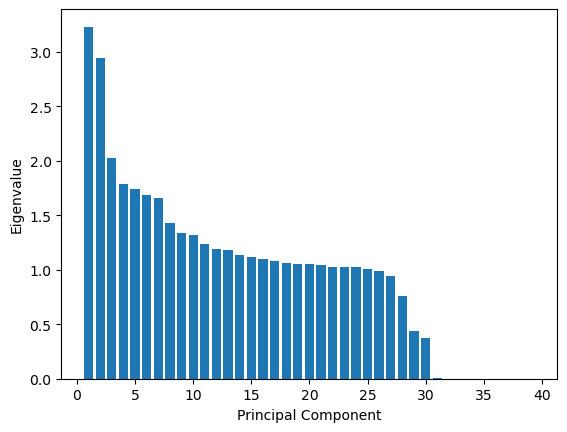

In [29]:
# perform PCA
pca_base = PCA()
pca_base_df = pca_base.fit_transform(scaled_df_f)

# print the results
print(("Explained Variance: %s") % (pca_base.explained_variance_ratio_))


plt.bar(np.arange(1, pca_base.n_components_+1), pca_base.explained_variance_)
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

Explained Variance: [8.28750454e-02 7.53955846e-02 5.20652067e-02 4.58641640e-02
 4.45834792e-02 4.31725147e-02 4.24973003e-02 3.66225412e-02
 3.44063003e-02 3.37376942e-02 3.17198669e-02 3.04824929e-02
 3.03567300e-02 2.90137943e-02 2.85680383e-02 2.81109899e-02
 2.77852362e-02 2.71759709e-02 2.70963505e-02 2.69158971e-02
 2.67279576e-02 2.63827695e-02 2.63649824e-02 2.61955877e-02
 2.58864822e-02 2.54259022e-02 2.40850984e-02 1.95797348e-02
 1.12341282e-02 9.52402843e-03 1.48060101e-04 7.08381190e-08]


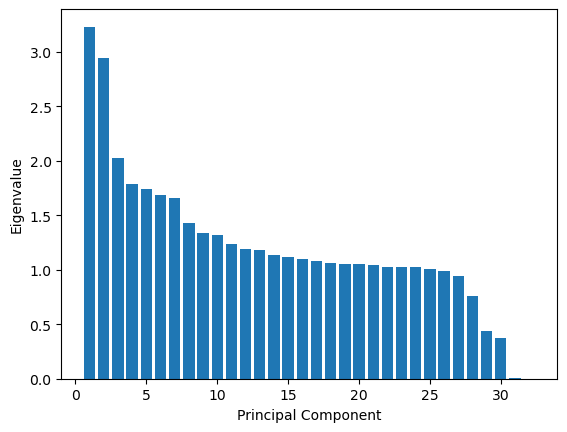

In [30]:
# perform PCA
pca_mle = PCA(n_components='mle', svd_solver='full')
pca_mle_df = pca_mle.fit_transform(scaled_df_f)

# print the results
print(("Explained Variance: %s") % (pca_mle.explained_variance_ratio_))


plt.bar(np.arange(1, pca_mle.n_components_+1), pca_mle.explained_variance_)
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

In [31]:
# Get the explained variance ratio and cumulative explained variance ratio
explained_variance_ratio = pca_mle.explained_variance_ratio_
cumulative_variance_ratio = pca_mle.explained_variance_ratio_.cumsum()

# Get the number of components that explain a certain amount of variance
desired_variance_ratio = 0.95  # Example threshold of 95% variance explained
n_components_threshold = np.argmax(cumulative_variance_ratio >= desired_variance_ratio) + 1

print("Number of components:", pca_mle.n_components_)
print("Explained variance ratio:", explained_variance_ratio)
print("Cumulative explained variance ratio:", cumulative_variance_ratio)
print("Number of components for {} variance:".format(desired_variance_ratio), n_components_threshold)

Number of components: 32
Explained variance ratio: [8.28750454e-02 7.53955846e-02 5.20652067e-02 4.58641640e-02
 4.45834792e-02 4.31725147e-02 4.24973003e-02 3.66225412e-02
 3.44063003e-02 3.37376942e-02 3.17198669e-02 3.04824929e-02
 3.03567300e-02 2.90137943e-02 2.85680383e-02 2.81109899e-02
 2.77852362e-02 2.71759709e-02 2.70963505e-02 2.69158971e-02
 2.67279576e-02 2.63827695e-02 2.63649824e-02 2.61955877e-02
 2.58864822e-02 2.54259022e-02 2.40850984e-02 1.95797348e-02
 1.12341282e-02 9.52402843e-03 1.48060101e-04 7.08381190e-08]
Cumulative explained variance ratio: [0.08287505 0.15827063 0.21033584 0.2562     0.30078348 0.34395599
 0.38645329 0.42307584 0.45748214 0.49121983 0.5229397  0.55342219
 0.58377892 0.61279271 0.64136075 0.66947174 0.69725698 0.72443295
 0.7515293  0.7784452  0.80517316 0.83155592 0.85792091 0.88411649
 0.91000298 0.93542888 0.95951398 0.97909371 0.99032784 0.99985187
 0.99999993 1.        ]
Number of components for 0.95 variance: 27


# Clustering

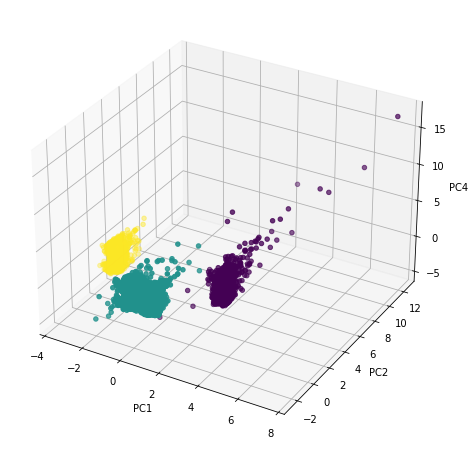

In [18]:
from sklearn.cluster import KMeans

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(pca_mle_df)

# Plot scatter plot with cluster labels
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_mle_df[:, 0], pca_mle_df[:, 1], pca_mle_df[:, 3], c=kmeans.labels_, cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC4')
plt.show()

In [19]:
product={}

for i in range(len(df)):
    if df['Product Name'][i] not in product:
        product[df['Product Name'][i]] = []
        product[df['Product Name'][i]].append(kmeans.labels_[i])
    else:
        product[df['Product Name'][i]].append(kmeans.labels_[i])

In [20]:
product

{'Bush Somerset Collection Bookcase': [2, 2, 2, 2],
 'Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back': [2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2],
 'Self-Adhesive Address Labels for Typewriters by Universal': [1,
  1,
  1,
  1,
  1,
  1,
  1],
 'Bretford CR4500 Series Slim Rectangular Table': [2, 2, 2, 2, 2, 2, 2, 2],
 "Eldon Fold 'N Roll Cart System": [1, 1, 1, 1, 1],
 'Eldon Expressions Wood and Plastic Desk Accessories, Cherry Wood': [2,
  2,
  2,
  2,
  2],
 'Newell 322': [1, 1, 1, 1, 1, 1],
 'Mitel 5320 IP Phone VoIP phone': [0, 0, 0, 0],
 'DXL Angle-View Binders with Locking Rings by Samsill': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'Belkin F5C206VTEL 6 Outlet Surge': [1, 1, 1, 1, 1, 1, 1],
 'Chromcraft Rectangular Conference Tables': [2, 2, 2, 2, 2, 2, 2, 2, 2],
 'Konftel 250 Conference�phone�- Charcoal black': [0, 0, 0, 0],
 'Xerox 1967': [1, 1, 1, 1, 1],
 'Fellowes PB200 Plastic Comb Binding Machine': [1, 1, 1, 1, 1, 1, 1, 1, 1],
 'Holme

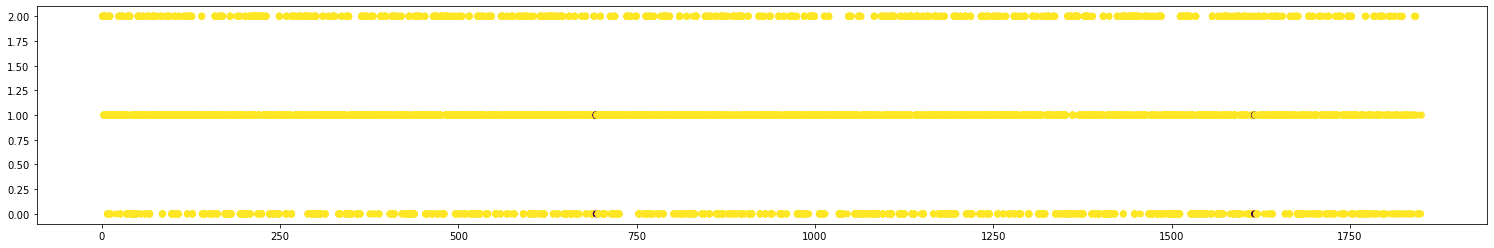

In [21]:
x_number = []
y_cluster = []
c_product = []
c_isitsame = []

c=0
for i in product:
    c=c+1
    for j in range(len(product[i])):
        #print(i, product[i][j], c)
        x_number.append(len(x_number)+1)
        y_cluster.append(product[i][j])
        c_product.append(c)
        c_isitsame.append(len(set(product[i]))<=1)


fig = plt.figure(figsize=(26,4))
plt.scatter(c_product, y_cluster, c=c_isitsame)
plt.show()

In [22]:
# try with more cluster

In [23]:
# Perform K-means clustering
kmeans10 = KMeans(n_clusters=10, random_state=0)
kmeans10.fit(pca_mle_df)

KMeans(n_clusters=10, random_state=0)

In [24]:
product={}

for i in range(len(df)):
    if df['Product Name'][i] not in product:
        product[df['Product Name'][i]] = []
        product[df['Product Name'][i]].append(kmeans10.labels_[i])
    else:
        product[df['Product Name'][i]].append(kmeans10.labels_[i])

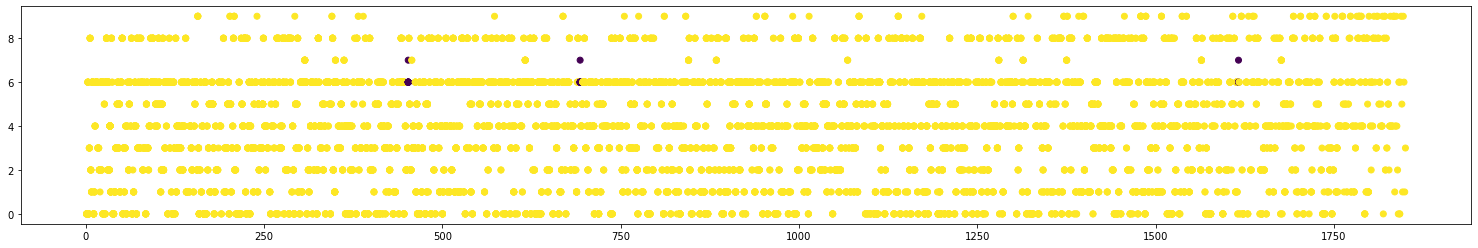

In [25]:
x_number = []
y_cluster = []
c_product = []
c_isitsame = []

c=0
for i in product:
    c=c+1
    for j in range(len(product[i])):
        #print(i, product[i][j], c)
        x_number.append(len(x_number)+1)
        y_cluster.append(product[i][j])
        c_product.append(c)
        c_isitsame.append(len(set(product[i]))<=1)


fig = plt.figure(figsize=(26,4))
plt.scatter(c_product, y_cluster, c=c_isitsame)
plt.show()

In [26]:
# what if we reduce the number of PCA components?

In [27]:
# perform PCA
pca4 = PCA(n_components=4)
pca4_df = pca4.fit_transform(scaled_df_f)

In [28]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(pca4_df)


KMeans(n_clusters=4, random_state=0)

In [29]:
product={}

for i in range(len(df)):
    if df['Product Name'][i] not in product:
        product[df['Product Name'][i]] = []
        product[df['Product Name'][i]].append(kmeans.labels_[i])
    else:
        product[df['Product Name'][i]].append(kmeans.labels_[i])

In [30]:
product

{'Bush Somerset Collection Bookcase': [2, 2, 2, 2],
 'Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back': [2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2],
 'Self-Adhesive Address Labels for Typewriters by Universal': [3,
  1,
  3,
  1,
  1,
  1,
  1],
 'Bretford CR4500 Series Slim Rectangular Table': [2, 2, 2, 2, 2, 2, 2, 2],
 "Eldon Fold 'N Roll Cart System": [3, 3, 3, 3, 3],
 'Eldon Expressions Wood and Plastic Desk Accessories, Cherry Wood': [2,
  2,
  2,
  2,
  2],
 'Newell 322': [3, 3, 3, 1, 1, 3],
 'Mitel 5320 IP Phone VoIP phone': [0, 0, 0, 0],
 'DXL Angle-View Binders with Locking Rings by Samsill': [1,
  3,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'Belkin F5C206VTEL 6 Outlet Surge': [3, 1, 3, 3, 3, 3, 3],
 'Chromcraft Rectangular Conference Tables': [2, 2, 2, 2, 2, 2, 2, 2, 2],
 'Konftel 250 Conference�phone�- Charcoal black': [0, 0, 0, 0],
 'Xerox 1967': [3, 3, 3, 3, 3],
 'Fellowes PB200 Plastic Comb Binding Machine': [1, 1, 1, 1, 1, 1, 1, 1, 1],
 'Holme

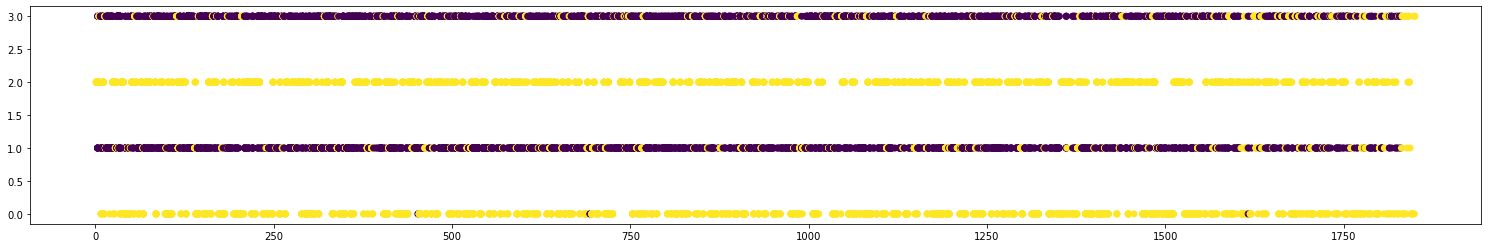

In [31]:
x_number = []
y_cluster = []
c_product = []
c_isitsame = []

c=0
for i in product:
    c=c+1
    for j in range(len(product[i])):
        #print(i, product[i][j], c)
        x_number.append(len(x_number)+1)
        y_cluster.append(product[i][j])
        c_product.append(c)
        c_isitsame.append(len(set(product[i]))<=1)


fig = plt.figure(figsize=(26,4))
plt.scatter(c_product, y_cluster, c=c_isitsame)
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(scaled_df_f, test_size=0.33)

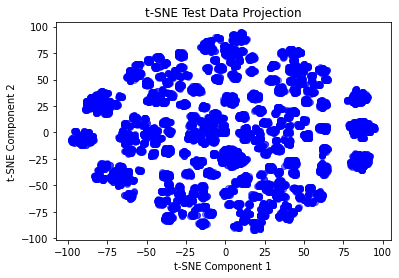

In [33]:
# t-Distributed Stochastic Neighbor Embedding

from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=2023, perplexity=30)
tsne_df = tsne.fit_transform(scaled_df_f)

# Plot the transformed test data
plt.scatter(tsne_df[:, 0], tsne_df[:, 1], c='blue', marker='o', alpha=0.5)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Test Data Projection')
plt.show()

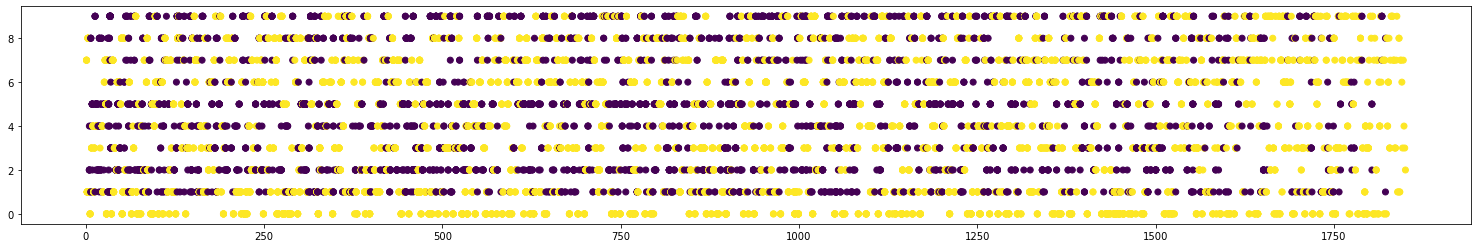

In [34]:
# Perform K-means clustering
kmeans10 = KMeans(n_clusters=10, random_state=0)
kmeans10.fit(tsne_df)
product={}

for i in range(len(df)):
    if df['Product Name'][i] not in product:
        product[df['Product Name'][i]] = []
        product[df['Product Name'][i]].append(kmeans10.labels_[i])
    else:
        product[df['Product Name'][i]].append(kmeans10.labels_[i])
x_number = []
y_cluster = []
c_product = []
c_isitsame = []

c=0
for i in product:
    c=c+1
    for j in range(len(product[i])):
        #print(i, product[i][j], c)
        x_number.append(len(x_number)+1)
        y_cluster.append(product[i][j])
        c_product.append(c)
        c_isitsame.append(len(set(product[i]))<=1)


fig = plt.figure(figsize=(26,4))
plt.scatter(c_product, y_cluster, c=c_isitsame)
plt.show()

In [41]:
# Clustering Validation - silhouette_score, Calinski-Harabasz Index

from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn import metrics
from sklearn.metrics import pairwise_distances

# Clustering Method - Kmean, Hierarchical
from sklearn.cluster import AgglomerativeClustering



In [47]:
range_n_clusters = [4, 5, 6, 7, 8, 9, 10]
silhouette_avg = []
Calinski = []
clustering_score = []
Name = []

silhouette_avg.append([])
Calinski.append([])
clustering_score.append([])
Name.append('PCA-KMean')
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(pca_mle_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg[-1].append(silhouette_score(pca_mle_df, cluster_labels))
    Calinski[-1].append(metrics.calinski_harabasz_score(pca_mle_df, cluster_labels))

    product={}
    for i in range(len(df)):
        if df['Product Name'][i] not in product:
            product[df['Product Name'][i]] = []
            product[df['Product Name'][i]].append(clusterer.labels_[i])
        else:
            product[df['Product Name'][i]].append(clusterer.labels_[i])
    c = 0
    for i in product:
        c += (len(set(product[i]))<=1)
    clustering_score[-1].append(c/len(product))

    
silhouette_avg.append([])
Calinski.append([])
clustering_score.append([])
Name.append('PCA-Hierarchical')
for n_clusters in range_n_clusters:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage="average")
    cluster_labels = clusterer.fit_predict(pca_mle_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg[-1].append(silhouette_score(pca_mle_df, cluster_labels))
    Calinski[-1].append(metrics.calinski_harabasz_score(pca_mle_df, cluster_labels))

    product={}
    for i in range(len(df)):
        if df['Product Name'][i] not in product:
            product[df['Product Name'][i]] = []
            product[df['Product Name'][i]].append(clusterer.labels_[i])
        else:
            product[df['Product Name'][i]].append(clusterer.labels_[i])
    c = 0
    for i in product:
        c += (len(set(product[i]))<=1)
    clustering_score[-1].append(c/len(product))


silhouette_avg.append([])
Calinski.append([])
clustering_score.append([])
Name.append('TSNE-KMean')
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(tsne_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg[-1].append(silhouette_score(tsne_df, cluster_labels))
    Calinski[-1].append(metrics.calinski_harabasz_score(tsne_df, cluster_labels))

    product={}
    for i in range(len(df)):
        if df['Product Name'][i] not in product:
            product[df['Product Name'][i]] = []
            product[df['Product Name'][i]].append(clusterer.labels_[i])
        else:
            product[df['Product Name'][i]].append(clusterer.labels_[i])
    c = 0
    for i in product:
        c += (len(set(product[i]))<=1)
    clustering_score[-1].append(c/len(product))


silhouette_avg.append([])
Calinski.append([])
clustering_score.append([])
Name.append('TSNE-Hierarchical')
for n_clusters in range_n_clusters:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage="average")
    cluster_labels = clusterer.fit_predict(tsne_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg[-1].append(silhouette_score(tsne_df, cluster_labels))
    Calinski[-1].append(metrics.calinski_harabasz_score(tsne_df, cluster_labels))

    product={}
    for i in range(len(df)):
        if df['Product Name'][i] not in product:
            product[df['Product Name'][i]] = []
            product[df['Product Name'][i]].append(clusterer.labels_[i])
        else:
            product[df['Product Name'][i]].append(clusterer.labels_[i])
    c = 0
    for i in product:
        c += (len(set(product[i]))<=1)
    clustering_score[-1].append(c/len(product))



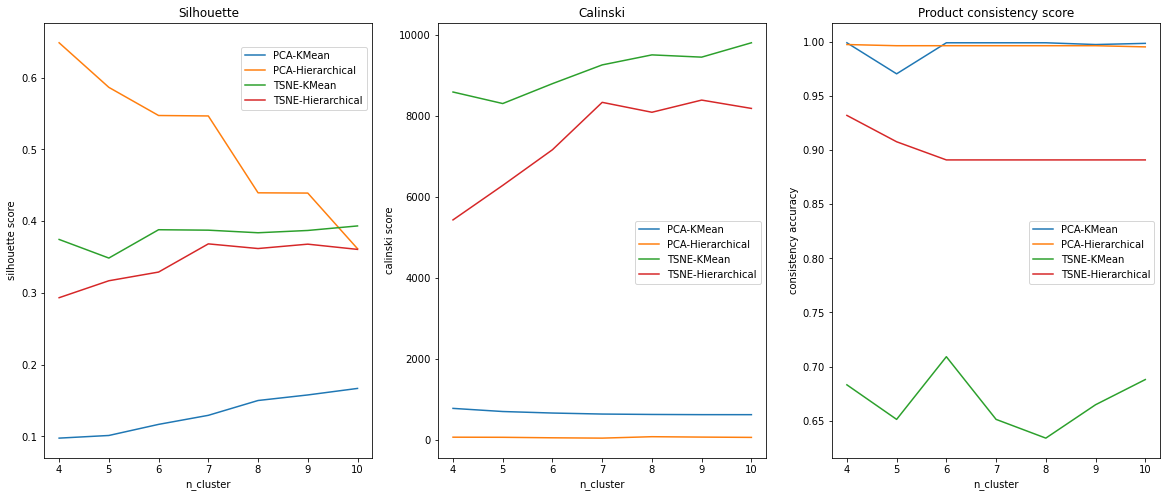

In [53]:
plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
for i in range(len(silhouette_avg)):
    plt.plot(range_n_clusters, silhouette_avg[i], label = Name[i])
plt.title('Silhouette')
plt.xlabel('n_cluster')
plt.ylabel('silhouette score')
plt.legend(loc=(0.6, 0.8))

plt.subplot(1, 3, 2)
for i in range(len(Calinski)):
    plt.plot(range_n_clusters, Calinski[i], label = Name[i])
plt.title('Calinski')
plt.xlabel('n_cluster')
plt.ylabel('calinski score')
plt.legend(loc=(0.6, 0.4))


plt.subplot(1, 3, 3)
for i in range(len(clustering_score)):
    plt.plot(range_n_clusters, clustering_score[i], label = Name[i])
plt.title('Product consistency score')
plt.xlabel('n_cluster')
plt.ylabel('consistency accuracy')
plt.legend(loc=(0.6, 0.4))

plt.show()